In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
 # gas is given by the equations

Xh = np.random.random()
Xw = np.random.random()*(1-Xh)
Xc = 1-Xh-Xw


In [4]:
# this time, first formulate the internal gas model as 
# a differential equation instead of a difference eqn, 
# still using the model from
# https://arxiv.org/abs/astro-ph/0005081


100%|██████████| 5901/5901 [00:00<00:00, 405780.60it/s]

initial conditions: Xh=0.47665712028626894 Xw=0.18443462712849854 Xc= 0.3389082525852325


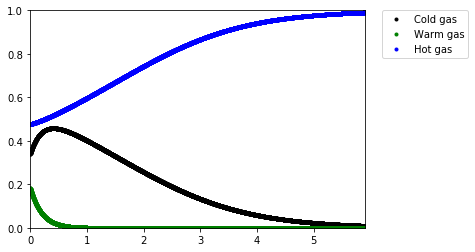

In [61]:
# gas is given by the equations

Xh = np.random.random()
Xw = np.random.random()*(1-Xh)
Xc = 1-Xh-Xw
print('initial conditions: Xh='+str(Xh)+' Xw='+str(Xw)+' Xc=',str(Xc))
time = 0.001 # initial time, in Gyr
timearr = np.linspace(0.001,5.901,5901)
Xcarr = np.zeros(timearr.shape)
Xwarr = np.zeros(timearr.shape)
Xharr = np.zeros(timearr.shape)


# time goes from 1Myr to 5.9Myr in 1Myr steps?

tstep = 0.001

# sweeping of warm gas into the cold component at a rate astar(Xw)
astar = 0.5 # usually 5e-8 /yr
# this term being too big is wrecking the equation

# evaporation of cold clouds embedded in the hot gas 
# at a rate bstar(Xc)(Xh)^2
bstar = 0.1 # usually 1e-7 to 1e-8 /yr

# radiative cooling of the hot gas by mixing with the ambient warm gas
# at a rate cstar(Xw)(Xh)
cstar = 0.01  # usually 1e-6 to 1e-7 /yr

# additional: sweeping of hot gas into cold gas
fstar = 0.0

A = astar/cstar
B = bstar/cstar
F = fstar/cstar

for numsteps in tqdm(range(len(timearr))):
    
    #dtau = cstar*(tsnew - ts)
    dtau = cstar*tstep*1e9
    dXc = (A*Xw - B*Xc*Xh*Xh + F*Xh)/dtau
    dXw = (-A*Xw + Xw*Xh)/dtau
    dXh = (B*Xc*Xh*Xh - Xw*Xh - F*Xh)/dtau
    #print(dXc, dXh)
    Xc = Xc + dXc
    Xh = Xh + dXh
    Xw = Xw + dXw
    if Xc < 0 or Xh < 0 or Xw < 0:
        print(Xc-dXc,Xh-dXh,Xw-dXw)
        print(dXc,dXh,dXw)
        print(Xc,Xh,Xw)
        print('iteration number: '+str(numsteps))
        break
    
    # dXc + dXw + dXh = 0, as expected 
    
    Xcarr[numsteps] = Xc
    Xharr[numsteps] = Xh
    Xwarr[numsteps] = Xw

    time = time+tstep
    
plt.plot(timearr,Xcarr,'k.',label="Cold gas")
plt.plot(timearr,Xwarr,'g.',label="Warm gas")
plt.plot(timearr,Xharr,'b.',label="Hot gas")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.axis([0,time,0,1])
plt.show()


In [69]:
# and to this add inflows and outflows, from 
# https://arxiv.org/pdf/1606.07436.pdf  (Mitra, Dave and Finlator (2016))
# and https://arxiv.org/pdf/1108.0426.pdf (Dave, Finlator and Oppenheimer (2011))

In [70]:
# first experiment with stochastic inflows/outflows?
# equilibrium model condition: dM_in/dt = dM_out/dt + SFR (ie. dM_stars/dt)

# in my current model, SFR = Xc^1.5


100%|██████████| 5901/5901 [00:00<00:00, 443304.70it/s]

initial conditions: Xh=0.2933481238006761 Xw=0.16253083595039705 Xc= 0.5441210402489268


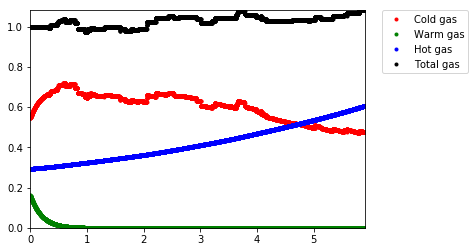

In [88]:
# gas is given by the equations

Xh = np.random.random()
Xw = np.random.random()*(1-Xh)
Xc = 1-Xh-Xw
print('initial conditions: Xh='+str(Xh)+' Xw='+str(Xw)+' Xc=',str(Xc))
time = 0.001 # initial time, in Gyr
timearr = np.linspace(0.001,5.901,5901)
Xcarr = np.zeros(timearr.shape)
Xwarr = np.zeros(timearr.shape)
Xharr = np.zeros(timearr.shape)


# time goes from 1Myr to 5.9Myr in 1Myr steps?

tstep = 0.001

# sweeping of warm gas into the cold component at a rate astar(Xw)
astar = 0.5 # usually 5e-8 /yr
# this term being too big is wrecking the equation

# evaporation of cold clouds embedded in the hot gas 
# at a rate bstar(Xc)(Xh)^2
bstar = 0.05 # usually 1e-7 to 1e-8 /yr

# radiative cooling of the hot gas by mixing with the ambient warm gas
# at a rate cstar(Xw)(Xh)
cstar = 0.01  # usually 1e-6 to 1e-7 /yr

# additional: sweeping of hot gas into cold gas
fstar = 0.0

A = astar/cstar
B = bstar/cstar
F = fstar/cstar

for numsteps in tqdm(range(len(timearr))):
    
    #dtau = cstar*(tsnew - ts)
    dtau = cstar*tstep*1e9
    dXc = (A*Xw - B*Xc*Xh*Xh + F*Xh)/dtau
    dXw = (-A*Xw + Xw*Xh)/dtau
    dXh = (B*Xc*Xh*Xh - Xw*Xh - F*Xh)/dtau
    #print(dXc, dXh)
    Xc = Xc + dXc
    Xh = Xh + dXh
    Xw = Xw + dXw
    
    # dXc + dXw + dXh = 0, as expected 
    
    if Xc < 0 or Xh < 0 or Xw < 0:
        print(Xc-dXc,Xh-dXh,Xw-dXw)
        print(dXc,dXh,dXw)
        print(Xc,Xh,Xw)
        print('iteration number: '+str(numsteps))
        break
        
    # add inflow/outflow conditions here
    
    # event trigger - currently delta function, 
    # try smoothing it out over some baryon cycling timescale
    if np.random.random() > np.random.random()*50:
    # currently just inflow of cold gas
        #Xc = Xc*(1 + np.random.random()/100)
    # now try inflows and outflows of cold gas
        delta_gas = np.random.normal()/100
        if Xc < delta_gas:
            Xc = Xc + np.abs(delta_gas)
        else:
            if np.random.random() > 0.5:
                Xc = Xc + delta_gas
            else:
                Xc = Xc - delta_gas
            
    
    Xcarr[numsteps] = Xc
    Xharr[numsteps] = Xh
    Xwarr[numsteps] = Xw

    time = time+tstep
    
plt.plot(timearr,Xcarr,'r.',label="Cold gas")
plt.plot(timearr,Xwarr,'g.',label="Warm gas")
plt.plot(timearr,Xharr,'b.',label="Hot gas")
plt.plot(timearr,Xcarr+Xwarr+Xharr,'k.',label="Total gas")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.axis([0,time,0,np.amax(Xcarr+Xwarr+Xharr)])
plt.show()



100%|██████████| 5901/5901 [00:00<00:00, 305408.22it/s]

initial conditions: Xh=0.45614699459865327 Xw=0.15015120852498376 Xc= 0.393701796876363


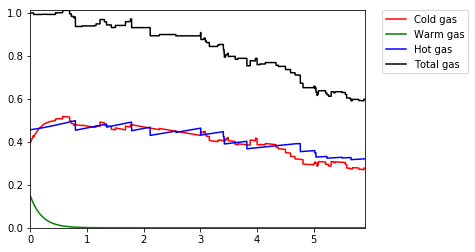

In [104]:
# gas is given by the equations

Xh = np.random.random()
Xw = np.random.random()*(1-Xh)
Xc = 1-Xh-Xw
print('initial conditions: Xh='+str(Xh)+' Xw='+str(Xw)+' Xc=',str(Xc))
time = 0.001 # initial time, in Gyr
timearr = np.linspace(0.001,5.901,5901)
Xcarr = np.zeros(timearr.shape)
Xwarr = np.zeros(timearr.shape)
Xharr = np.zeros(timearr.shape)


# time goes from 1Myr to 5.9Myr in 1Myr steps?

tstep = 0.001

# sweeping of warm gas into the cold component at a rate astar(Xw)
astar = 0.5 # usually 5e-8 /yr
# this term being too big is wrecking the equation

# evaporation of cold clouds embedded in the hot gas 
# at a rate bstar(Xc)(Xh)^2
bstar = 0.05 # usually 1e-7 to 1e-8 /yr

# radiative cooling of the hot gas by mixing with the ambient warm gas
# at a rate cstar(Xw)(Xh)
cstar = 0.01  # usually 1e-6 to 1e-7 /yr

# additional: sweeping of hot gas into cold gas
fstar = 0.0

A = astar/cstar
B = bstar/cstar
F = fstar/cstar

for numsteps in tqdm(range(len(timearr))):
    
    #dtau = cstar*(tsnew - ts)
    dtau = cstar*tstep*1e9
    dXc = (A*Xw - B*Xc*Xh*Xh + F*Xh)/dtau
    dXw = (-A*Xw + Xw*Xh)/dtau
    dXh = (B*Xc*Xh*Xh - Xw*Xh - F*Xh)/dtau
    #print(dXc, dXh)
    Xc = Xc + dXc
    Xh = Xh + dXh
    Xw = Xw + dXw
    
    # dXc + dXw + dXh = 0, as expected 
    
    if Xc < 0 or Xh < 0 or Xw < 0:
        print(Xc-dXc,Xh-dXh,Xw-dXw)
        print(dXc,dXh,dXw)
        print(Xc,Xh,Xw)
        print('iteration number: '+str(numsteps))
        break
        
    # add inflow/outflow conditions here
    
    # event trigger - currently delta function, 
    # try smoothing it out over some baryon cycling timescale
    if np.random.random() > np.random.random()*50:
    # currently just inflow of cold gas
        #Xc = Xc*(1 + np.random.random()/100)
    # now try inflows and outflows of cold gas
        delta_gas = np.random.normal()/100
        if Xc < delta_gas:
            Xc = Xc + np.abs(delta_gas)
        else:
            if np.random.random() > 0.5:
                Xc = Xc + delta_gas
            else:
                Xc = Xc - delta_gas
                
    if Xh > Xc and Xh > Xw:
        if np.random.random() > np.random.random()*100:
            Xh = Xh*(1-np.random.random()/10)
            
    
    Xcarr[numsteps] = Xc
    Xharr[numsteps] = Xh
    Xwarr[numsteps] = Xw

    time = time+tstep
    
plt.plot(timearr,Xcarr,'r',label="Cold gas")
plt.plot(timearr,Xwarr,'g',label="Warm gas")
plt.plot(timearr,Xharr,'b',label="Hot gas")
plt.plot(timearr,Xcarr+Xwarr+Xharr,'k',label="Total gas")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.axis([0,time,0,np.amax(Xcarr+Xwarr+Xharr)])
plt.show()



  0%|          | 0/5901 [00:00<?, ?it/s]

initial conditions: Xh=0.5280097969512588 Xw=0.38061641910292954 Xc= 0.09137378394581164
-0.024779970939589155 0.6302461701770273 0.0006039791086131901
7.941324583452261e-06 -4.959494592393351e-06 -2.9818299910589108e-06
-0.024772029615005704 0.630241210682435 0.0006009972786221312
iteration number: 1301


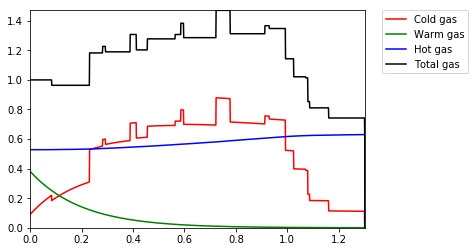

In [109]:
# gas is given by the equations

Xh = np.random.random()
Xw = np.random.random()*(1-Xh)
Xc = 1-Xh-Xw
print('initial conditions: Xh='+str(Xh)+' Xw='+str(Xw)+' Xc=',str(Xc))
time = 0.001 # initial time, in Gyr
timearr = np.linspace(0.001,5.901,5901)
Xcarr = np.zeros(timearr.shape)
Xwarr = np.zeros(timearr.shape)
Xharr = np.zeros(timearr.shape)


# time goes from 1Myr to 5.9Myr in 1Myr steps?

tstep = 0.001

# sweeping of warm gas into the cold component at a rate astar(Xw)
astar = 0.5 # usually 5e-8 /yr
# this term being too big is wrecking the equation

# evaporation of cold clouds embedded in the hot gas 
# at a rate bstar(Xc)(Xh)^2
bstar = 0.05 # usually 1e-7 to 1e-8 /yr

# radiative cooling of the hot gas by mixing with the ambient warm gas
# at a rate cstar(Xw)(Xh)
cstar = 0.01  # usually 1e-6 to 1e-7 /yr

# additional: sweeping of hot gas into cold gas
fstar = 0.0

A = astar/cstar
B = bstar/cstar
F = fstar/cstar

for numsteps in tqdm(range(len(timearr))):
    
    #dtau = cstar*(tsnew - ts)
    dtau = cstar*tstep*1e9
    dXc = (A*Xw - B*Xc*Xh*Xh + F*Xh)/dtau
    dXw = (-A*Xw + Xw*Xh)/dtau
    dXh = (B*Xc*Xh*Xh - Xw*Xh - F*Xh)/dtau
    #print(dXc, dXh)
    Xc = Xc + dXc
    Xh = Xh + dXh
    Xw = Xw + dXw
    
    # dXc + dXw + dXh = 0, as expected 
    
    if Xc < 0 or Xh < 0 or Xw < 0:
        print(Xc-dXc,Xh-dXh,Xw-dXw)
        print(dXc,dXh,dXw)
        print(Xc,Xh,Xw)
        print('iteration number: '+str(numsteps))
        break
        
    # add inflow/outflow conditions here
    
    # event trigger - currently delta function, 
    # try smoothing it out over some baryon cycling timescale
    if np.random.random() > np.random.random()*50:
    # currently just inflow of cold gas
        #Xc = Xc*(1 + np.random.random()/100)
    # now try inflows and outflows of cold gas
        delta_gas = np.random.normal()/10
        if Xc < delta_gas:
            Xc = Xc + np.abs(delta_gas)
        else:
            if np.random.random() > 0.5:
                Xc = Xc + delta_gas
            else:
                Xc = Xc - delta_gas
                
    if Xh > Xc and Xh > Xw:
        if np.random.random() > np.random.random()*300:
            Xh = Xh*(1-np.random.random()/3)
            
    
    Xcarr[numsteps] = Xc
    Xharr[numsteps] = Xh
    Xwarr[numsteps] = Xw

    time = time+tstep
    
plt.plot(timearr,Xcarr,'r',label="Cold gas")
plt.plot(timearr,Xwarr,'g',label="Warm gas")
plt.plot(timearr,Xharr,'b',label="Hot gas")
plt.plot(timearr,Xcarr+Xwarr+Xharr,'k',label="Total gas")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.axis([0,time,0,np.amax(Xcarr+Xwarr+Xharr)])
plt.show()



100%|██████████| 5901/5901 [00:00<00:00, 110375.93it/s]

initial conditions: Xh=0.4715169858251177 Xw=0.11753761711921382 Xc= 0.41094539705566846


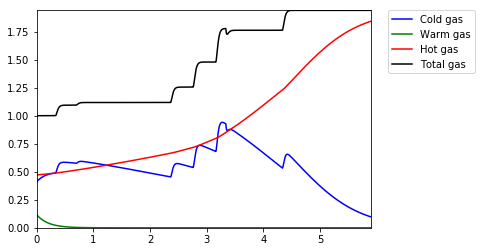

In [180]:
# gas is given by the equations

Xh = np.random.random()
Xw = np.random.random()*(1-Xh)
Xc = 1-Xh-Xw
print('initial conditions: Xh='+str(Xh)+' Xw='+str(Xw)+' Xc=',str(Xc))
time = 0.001 # initial time, in Gyr
timearr = np.linspace(0.001,5.901,5901)
Xcarr = np.zeros(timearr.shape)
Xwarr = np.zeros(timearr.shape)
Xharr = np.zeros(timearr.shape)


# time goes from 1Myr to 5.9Myr in 1Myr steps?

tstep = 0.001

# sweeping of warm gas into the cold component at a rate astar(Xw)
astar = 0.5 # usually 5e-8 /yr
# this term being too big is wrecking the equation

# evaporation of cold clouds embedded in the hot gas 
# at a rate bstar(Xc)(Xh)^2
bstar = 0.05 # usually 1e-7 to 1e-8 /yr

# radiative cooling of the hot gas by mixing with the ambient warm gas
# at a rate cstar(Xw)(Xh)
cstar = 0.01  # usually 1e-6 to 1e-7 /yr

# additional: sweeping of hot gas into cold gas
fstar = 0.0

A = astar/cstar
B = bstar/cstar
F = fstar/cstar

counter_in = 1
counter_out = 1 

for numsteps in tqdm(range(len(timearr))):
    
    #dtau = cstar*(tsnew - ts)
    dtau = cstar*tstep*1e9
    dXc = (A*Xw - B*Xc*Xh*Xh + F*Xh)/dtau
    dXw = (-A*Xw + Xw*Xh)/dtau
    dXh = (B*Xc*Xh*Xh - Xw*Xh - F*Xh)/dtau
    #print(dXc, dXh)
    Xc = Xc + dXc
    Xh = Xh + dXh
    Xw = Xw + dXw
    
    # dXc + dXw + dXh = 0, as expected 
    
    if Xc < 0 or Xh < 0 or Xw < 0:
        print(Xc-dXc,Xh-dXh,Xw-dXw)
        print(dXc,dXh,dXw)
        print(Xc,Xh,Xw)
        print('iteration number: '+str(numsteps))
        break
        
    # add inflow/outflow conditions here
    
    # event trigger - currently delta function, 
    # try smoothing it out over some baryon cycling timescale
    ts1 = 200
    ts2 = 20
    # start a counter and do something for that timescale
    
    if np.random.random() > np.random.random()*300:
    # currently just inflow of cold gas
        #Xc = Xc*(1 + np.random.random()/100)
    # now try inflows and outflows of cold gas
        delta_gas_in = np.random.random()/100
        counter_in = counter_in + ts1
        
                
    if Xh > Xc and Xh > Xw:
        if np.random.random() > np.random.random()*50:
            delta_gas_out = np.random.random()/10
            counter_out = counter_out + ts1
            
    if counter_in > 1:
        tsfc = ts1-counter_in
        Xc = Xc*(1 + delta_gas_in*tsfc*np.exp(-tsfc/ts2)/7)
        counter_in = counter_in -1
        
    if counter_out > 1:
        tsfc = tsfc-counter_out
        Xh = Xh*(1 - delta_gas_out*np.exp(-(tsfc-(ts2*4))*(tsfc-(ts2*4))/(2*ts2*ts2)))
        counter_out = counter_out -1
    
            
            #Xh = Xh*(1-np.random.random()/3)
            
    
    Xcarr[numsteps] = Xc
    Xharr[numsteps] = Xh
    Xwarr[numsteps] = Xw

    time = time+tstep
    
plt.plot(timearr,Xcarr,'b',label="Cold gas")
plt.plot(timearr,Xwarr,'g',label="Warm gas")
plt.plot(timearr,Xharr,'r',label="Hot gas")
plt.plot(timearr,Xcarr+Xwarr+Xharr,'k',label="Total gas")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.axis([0,time,0,np.amax(Xcarr+Xwarr+Xharr)])
plt.show()


In [161]:
# we could use equation (11) from Dave, Finlator and Oppenheimer (2011):
# SFR = (\xi * dM_grav/dt)/(1+\eta)(1-\alpha z)
# - equation that delineates how galaxy SFRs are governed by accretion and feedback processes: ie. baryon cycling

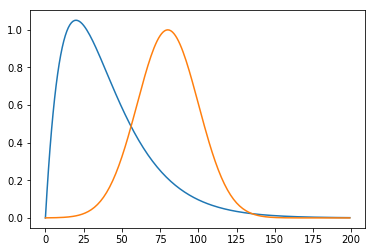

In [181]:
tar = np.arange(200)
plt.plot(tar*np.exp(-tar/20)/7)           # inflow smoothing
plt.plot(np.exp(-(tar-80)*(tar-80)/800))  # outflow smoothing
plt.show()

In [200]:
# eta     = ejective feedback
# xi      = preventive feedback
# alpha_z = reaccretion of ejected material = dM_recyc/dt/xi
# dMrecyc = accretion rate of the material that was previously ejected in outflows
# dMgrav  = gravitational infall rate of baryons into halo 
#           set by \LambdaCDM, ISM gas depletion timescale, and metal yield (to first order)
# trec    = wind recycling time 
z = 1.0
Mh = 1e12
eta1 = 10.85 + np.random.normal(0,0.06)
eta2 = 0.81 + np.random.normal(0,0.07)
eta3 = -1.15 + np.random.normal(0,0.07)
eta = np.power((Mh/np.power(10,eta1+eta2*np.sqrt(z))),eta3)
print(eta)

tau1 = 1.12 + np.random.normal(0.24)
tau2 = -0.62 + np.random.normal(0.11)
tau3 = -0.47 + np.random.normal(0.05)
trec = tau1*1e9*np.power(1+z,tau2)*np.power((Mh/1e12),tau3)
print(trec)

xi1 = -0.45 + np.random.normal(0.07)
xi2 = 0.51 + np.random.normal(0.15)
Mq = (0.96 + xi2*z)*1e12
xi = np.amin([1,np.power((Mh/Mq),xi1)])
print(xi)
print(np.power((Mh/Mq),xi1))

#SFR = (xi*dMgrav + dMrecyc)/((1+eta))
#Z = y*SFR/(xi*dMgrav)

# does this need to be changed from Halo mass to Stellar mass using some SMHM-esque thing?

# once we have some way of getting an initial Mgrav, we can then propagate it further to get SFHs
# Mrecyc comes from dMgrav at t' = t-t_rec
# perhaps choose 

0.410019820294
357168172.951
1.0
3.433760642


NameError: name 'dMgrav' is not defined